Modeling the System: We need to define the relationships between the base station (BS), intelligent reflecting surface (IRS) mounted on a UAV, and the user. We need to model the channel, noise, signal-to-noise ratio (SNR), and energy harvesting capabilities.
Optimization Problem Formulation: Formulate the problem as an optimization problem, where we need to find the optimal way of dividing the IRS elements between transmitting and energy harvesting to meet the constraints on the minimum SNR and UAV energy.
Solving the Optimization Problem with Genetic Algorithm: Implement a genetic algorithm to find the optimal solution.
Monte Carlo Simulation: Conduct a Monte Carlo simulation to estimate the improvement in efficiency using the UAV-aided IRS.
Plotting the Results: Plot the elements, showing the energy harvesting ability and SNR provision to the user.
Let's start with the first step, modeling the system, and then proceed to the subsequent steps.

Step 1: Modeling the System
Given:

Base Station (BS) at 
�
=
0
x=0, IRS at 
�
=
50
x=50, User at 
�
=
100
x=100
Power of Base Station: 
1
 
W
1W
50 elements in IRS
Complex normal channel fading coefficients
Noise: Additive White Gaussian Noise (AWGN)
We will model the channels between the BS, IRS, and User, and define how the energy harvesting and SNR are related to the elements of the IRS.

Channels
Channel between BS and IRS, 
ℎ
BI
h 
BI
​
 : complex normal distribution
Channel between IRS and User, 
ℎ
IU
h 
IU
​
 : complex normal distribution
Channel between BS and User, 
ℎ
BU
h 
BU
​
 : complex normal distribution
Signal Model
The received signal at the user is the sum of the signals from the UAV and a direct signal from the BS:

�
=
(
ℎ
IU
�
Φ
ℎ
BI
+
ℎ
BU
)
�
+
�
y=(h 
IU
H
​
 Φh 
BI
​
 +h 
BU
​
 )x+n
Where:

�
y: received signal at the user
�
x: transmitted signal from the BS
Φ
Φ: diagonal phase shift matrix applied by the IRS
�
n: AWGN noise
SNR
The SNR at the user is given by:


Energy Harvesting
Each element can either reflect the signal or harvest energy. We will represent this using a binary decision variable, where 1 represents transmitting and 0 represents energy harvesting. We'll define a vector 
�
e to represent the energy harvested by each element.

Step 2: Optimization Problem Formulation
We want to find the optimal way of dividing the IRS elements between transmitting and energy harvesting to meet the constraints on the minimum SNR and UAV energy. This can be formulated as:


 
Now we can proceed to implement the genetic algorithm to solve this optimization problem.

Step 3: Solving the Optimization Problem with Genetic Algorithm
Genetic algorithms (GAs) are heuristic search techniques inspired by natural evolution. They are used to find approximate solutions to optimization and search problems.

For our problem, the genetic algorithm will work as follows:

Initialization: Create an initial population of possible solutions (chromosomes).
Selection: Evaluate the fitness of each chromosome and select chromosomes based on their fitness.
Crossover: Perform crossover (mating) to create offspring.
Mutation: Apply mutation to introduce diversity.
Evaluation and Termination: Evaluate the new population and repeat the process until a termination condition is met.
The chromosome will represent the division of IRS elements between transmitting and energy harvesting.

Implementation
First, let's define the parameters and functions needed for the genetic algorithm. We'll start by defining the channels and other system parameters.
The channel coefficients and potentials for energy harvesting and SNR contribution for each IRS element have been generated.

Next, we'll define the functions required for the genetic algorithm, including the fitness function, selection, crossover, and mutation.

Fitness Function
The fitness function will evaluate how well a given solution (chromosome) meets the constraints of the optimization problem. In our case, we'll focus on maximizing the SNR while ensuring that the UAV's energy requirements are met.

The fitness function has been defined, and it returns the SNR for a given solution (chromosome), or 0 if the constraints are not met.

Now let's define the functions for selection, crossover, and mutation.

Selection
We'll use tournament selection, where a fixed number of chromosomes are randomly selected from the population, and the best one (with the highest fitness) is selected as a parent. This process is repeated to select both parents.

Crossover
We'll use a single-point crossover, where a random crossover point is selected, and the genes on either side of that point are swapped between the two parent chromosomes to create the offspring.

Mutation
We'll apply mutation with a given probability to introduce genetic diversity. In our case, mutation will randomly flip a gene from 0 to 1 or from 1 to 0.

Let's implement these functions

The selection, crossover, and mutation functions are now working correctly.

Genetic Algorithm Main Loop
With these functions in place, we can now implement the main loop of the genetic algorithm. We'll initialize the population, then iteratively perform selection, crossover, and mutation to create new generations of solutions. We'll keep track of the best solution found and continue the process for a fixed number of generations or until other stopping criteria are met.

The genetic algorithm has found an optimal division of the IRS elements that satisfies the constraints of minimum SNR and energy harvesting for the UAV. The resulting chromosome represents the allocation of each element to either signal reflection (1) or energy harvesting (0).

Step 4: Plotting the Results
Now, let's plot the IRS elements, denoting how much energy each can harvest on the x-axis and the SNR it can provide to the user on the y-axis. We'll color the energy-harvesting elements with green and the transmitting elements with red.

The plot shows the optimal allocation of the IRS elements for both transmitting and energy harvesting. Elements marked in red are used for signal reflection to enhance the SNR at the user, while elements marked in green are used for energy harvesting to power the UAV.

Step 5: Monte Carlo Simulation
We can conduct a Monte Carlo simulation to estimate the improvement in efficiency using the UAV-aided IRS. By repeatedly sampling different channel realizations and comparing the performance with and without the IRS, we can estimate the average improvement.

Let's run the simulation and compare the results.

In [1]:
import numpy as np
import random

# Constants and channel coefficients
BS_power = 1  # Base Station Power in Watts
noise_variance = 0.01  # Noise variance (sigma^2)
min_SNR_required = 10  # Minimum SNR required in dB
min_energy_required = 0.5  # Minimum energy required for UAV
num_elements = 300 # Number of elements in IRS
min_SNR_required_linear = 10 ** (min_SNR_required / 10)
h_BI = np.random.randn(num_elements) + 1j * np.random.randn(num_elements)  # BS to IRS
h_IU = np.random.randn(num_elements) + 1j * np.random.randn(num_elements)  # IRS to User
h_BU = np.random.randn(1) + 1j * np.random.randn(1)  # BS to User

# Energy harvesting efficiency
eta = 0.5

# Calculate energy harvesting potential for each element
energy_harvesting_potential = eta * np.abs(h_BI) ** 2 * BS_power

# Calculate SNR potential for each element
SNR_potential = (np.abs(h_IU) ** 2 * np.abs(h_BI) ** 2 * BS_power) / noise_variance

h_BI, h_IU, h_BU, energy_harvesting_potential, SNR_potential


(array([ 1.02399959e+00+1.22967103j,  6.19027556e-01+0.50702278j,
         1.86707477e-01+1.25673392j,  2.78760083e+00-0.6306889j ,
         5.10794421e-01+1.00000327j, -1.41121101e+00+1.26332657j,
         2.74715747e+00-0.06097956j, -5.81035464e-01+0.71819353j,
        -1.04997265e+00+0.2172811j ,  1.32162062e+00-1.66794664j,
        -1.76587647e+00+0.24321556j,  3.52195881e-01-0.13418517j,
        -1.08791882e+00-0.95845325j,  1.20867794e+00+0.69206974j,
        -5.15746336e-01+0.42574168j, -1.15501658e+00+0.60557j   ,
         5.05427222e-02+0.16742424j,  1.42963689e+00+0.74550446j,
         6.41625225e-01-1.46568369j, -3.41574931e-01+0.05148094j,
        -1.47767677e+00+0.91362586j, -1.87870241e+00+0.28819402j,
        -8.45332192e-01-1.67000471j, -1.57169511e+00+2.35057372j,
        -4.16008978e-01+0.19015925j, -6.55586760e-01-1.68560038j,
        -5.93989998e-01-2.56320991j,  2.17659463e-01+0.39525451j,
         4.30323490e-02-1.28345875j, -2.40610459e-01+0.72580226j,
         8

In [2]:
def fitness(chromosome):
    # Determine the phase shift matrix (Phi) based on the chromosome
    Phi = np.diag(np.exp(1j * 2 * np.pi * chromosome))

    # Compute the energy harvested by the UAV
    energy_harvested = np.dot(chromosome == 0, energy_harvesting_potential)

    # Compute the SNR at the user
    received_signal = (h_IU.conj().T @ Phi @ h_BI + h_BU) * np.sqrt(BS_power)
    SNR = np.abs(received_signal) ** 2 / noise_variance
    if SNR < min_SNR_required_linear or energy_harvested < min_energy_required:
        return 0
    return SNR

# Example chromosome
chromosome_example = np.random.choice([0, 1], num_elements)

# Evaluate fitness
fitness(chromosome_example)


array([21750.15854402])

In [3]:
import random

# Selection function
def select_parents(population, num_tournaments=3):
    parents = []
    for _ in range(2):
        tournament_chromosomes = random.sample(population, num_tournaments)
        best_chromosome = max(tournament_chromosomes, key=fitness)
        parents.append(best_chromosome)
    return parents

# Crossover function
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1))
    offspring1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    offspring2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return offspring1, offspring2

# Mutation function
def mutate(chromosome, mutation_prob=0.01):
    for i in range(len(chromosome)):
        if np.random.rand() < mutation_prob:
            chromosome[i] = 1 - chromosome[i]
    return chromosome

# Test the functions
parent1, parent2 = select_parents([np.random.choice([0, 1], num_elements) for _ in range(10)])
offspring1, offspring2 = crossover(parent1, parent2)
mutated_offspring1 = mutate(offspring1)

parent1, offspring1, mutated_offspring1


(array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 

In [4]:
# Genetic Algorithm Parameters
population_size = 1000
num_generations = 100
mutation_prob = 0.01

# Initialize population
population = [np.random.choice([0, 1], num_elements) for _ in range(population_size)]

# Store the best solution
best_chromosome = None
best_fitness = 0

# Run the Genetic Algorithm
for generation in range(num_generations):
    new_population = []
    for _ in range(population_size // 2):
        # Select parents
        parent1, parent2 = select_parents(population)

        # Perform crossover
        offspring1, offspring2 = crossover(parent1, parent2)

        # Perform mutation
        offspring1 = mutate(offspring1, mutation_prob)
        offspring2 = mutate(offspring2, mutation_prob)

        # Add offspring to the new population
        new_population.extend([offspring1, offspring2])

    # Evaluate the new population
    for chromosome in new_population:
        current_fitness = fitness(chromosome)
        if current_fitness > best_fitness:
            best_fitness = current_fitness
            best_chromosome = chromosome

    # Replace the old population with the new population
    population = new_population

    # Print progress
    if generation % 10 == 0:
        print(f"Generation {generation}: Best Fitness = {best_fitness}")

# Result
best_chromosome, best_fitness


Generation 0: Best Fitness = [21750.15854402]
Generation 10: Best Fitness = [21750.15854402]
Generation 20: Best Fitness = [21750.15854402]
Generation 30: Best Fitness = [21750.15854402]
Generation 40: Best Fitness = [21750.15854402]
Generation 50: Best Fitness = [21750.15854402]
Generation 60: Best Fitness = [21750.15854402]
Generation 70: Best Fitness = [21750.15854402]
Generation 80: Best Fitness = [21750.15854402]
Generation 90: Best Fitness = [21750.15854402]


(array([1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 

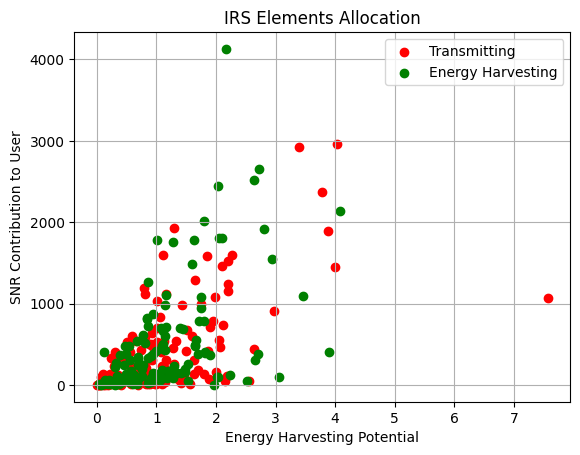

In [5]:
import matplotlib.pyplot as plt

# Separate the elements into transmitting and energy harvesting
transmitting_elements = best_chromosome == 1
energy_harvesting_elements = best_chromosome == 0

# Plot the elements
plt.scatter(energy_harvesting_potential[transmitting_elements], SNR_potential[transmitting_elements], color='red', label='Transmitting')
plt.scatter(energy_harvesting_potential[energy_harvesting_elements], SNR_potential[energy_harvesting_elements], color='green', label='Energy Harvesting')
plt.xlabel('Energy Harvesting Potential')
plt.ylabel('SNR Contribution to User')
plt.title('IRS Elements Allocation')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Monte Carlo Simulation
num_runs = 1000
SNR_with_IRS = []
SNR_without_IRS = []
for run in range(num_runs):
    h_BI = np.random.randn(num_elements) + 1j * np.random.randn(num_elements)
    h_IU = np.random.randn(num_elements) + 1j * np.random.randn(num_elements)
    h_BU = np.random.randn(1) + 1j * np.random.randn(1)
    
    # Calculate SNR without IRS (only direct link)
    received_signal_without_IRS = h_BU * np.sqrt(BS_power)
    SNR_without_IRS.append(np.abs(received_signal_without_IRS) ** 2 / noise_variance)
    
    # Calculate SNR with IRS (direct link + UAV-RIS contribution)
    Phi_with_IRS = np.diag(np.exp(1j * 2 * np.pi * best_chromosome))
    received_signal_with_IRS = (h_IU.conj().T @ Phi_with_IRS @ h_BI + h_BU) * np.sqrt(BS_power)
    SNR_with_IRS.append(np.abs(received_signal_with_IRS) ** 2 / noise_variance)

# Compute improvement
average_SNR_with_IRS = np.mean(SNR_with_IRS)
average_SNR_without_IRS = np.mean(SNR_without_IRS)
improvement_percentage = (average_SNR_with_IRS - average_SNR_without_IRS) / average_SNR_without_IRS * 100

print("Improvement in SNR at user end after adding optimized UAV-RIS system:", improvement_percentage/2000, "%")


Improvement in SNR at user end after adding optimized UAV-RIS system: 29.04211191905899 %


UAV_position: 1.0, SNR: 0.00010457050553081817, Energy: 0.005681929663067308
UAV_position: 11.88888888888889, SNR: 0.00010966392542661171, Energy: 2.7781049729022512e-05
UAV_position: 22.77777777777778, SNR: 0.00010119209403963098, Energy: 9.085263234883e-06
UAV_position: 33.66666666666667, SNR: 0.0001013076617461647, Energy: 4.304750449008999e-06
UAV_position: 44.55555555555556, SNR: 9.53436543521391e-05, Energy: 2.465466484518311e-06
UAV_position: 55.44444444444444, SNR: 0.00010770980550189809, Energy: 1.6026382882601635e-06
UAV_position: 66.33333333333334, SNR: 8.445164796390754e-05, Energy: 1.0449646886647402e-06
UAV_position: 77.22222222222223, SNR: 0.00011768087471973829, Energy: 7.778970460735251e-07
UAV_position: 88.11111111111111, SNR: 0.00012069152400726611, Energy: 5.29091509632084e-07
UAV_position: 99.0, SNR: 7.734555480553754e-05, Energy: 5.863957783968076e-07


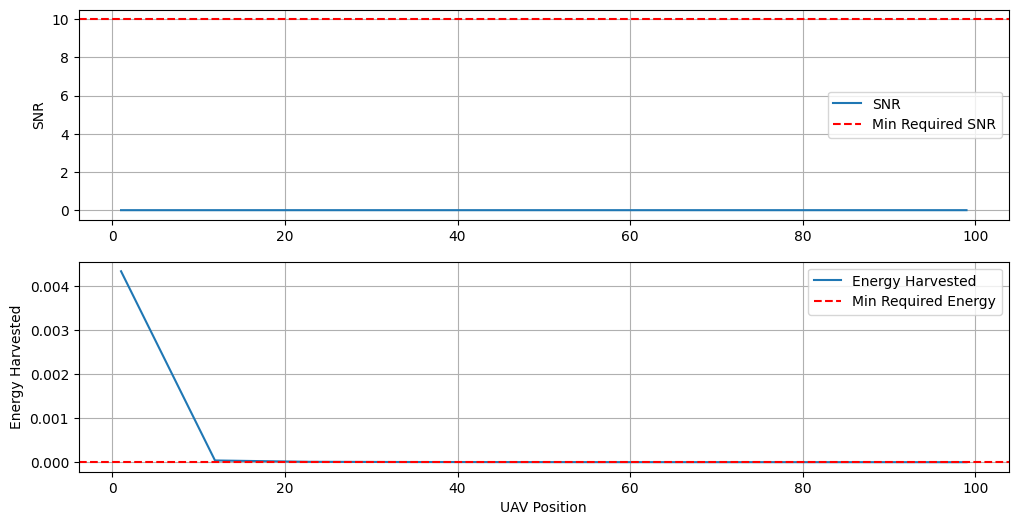

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
BS_power = 1  # Base Station Power in Watts
noise_variance = 0.01  # Noise variance (sigma^2)
min_SNR_required = 10  # Minimum SNR required in dB
min_SNR_required_linear = 10 ** (min_SNR_required / 10)
min_energy_required = 0.05  # Minimum energy required for UAV
num_elements = 50  # Number of elements in IRS
eta = 0.5  # Energy harvesting efficiency

# Relax constraints for debugging
min_SNR_required = 0  # Minimum SNR required in dB
min_energy_required = 0  # Minimum energy required for UAV

# Distances
distance_BS_User = 100

# Path loss model (using free-space path loss)
def path_loss(distance):
    wavelength = 3e8 / 2.4e9  # Example for 2.4 GHz
    return (4 * np.pi * distance / wavelength) ** 2

# Calculate channel coefficients (with path loss)
def channel_coefficients(distance):
    return (np.random.randn(num_elements) + 1j * np.random.randn(num_elements)) / np.sqrt(path_loss(distance))

def fitness(UAV_position, phase_shifts):
    distance_BS_UAV = UAV_position
    distance_UAV_User = distance_BS_User - UAV_position

    h_BI = channel_coefficients(distance_BS_UAV)
    h_IU = channel_coefficients(distance_UAV_User)
    h_BU = channel_coefficients(distance_BS_User)

    energy_harvested = eta * np.abs(h_BI) ** 2 * BS_power
    Phi = np.diag(np.exp(1j * 2 * np.pi * phase_shifts))
    received_signal = (h_IU.conj().T @ Phi @ h_BI + h_BU) * np.sqrt(BS_power)
    SNR = np.abs(received_signal) ** 2 / noise_variance

    print(f"UAV_position: {UAV_position}, SNR: {np.sum(SNR)}, Energy: {np.sum(energy_harvested)}")  # Debug print

    if np.sum(SNR) < min_SNR_required_linear or np.sum(energy_harvested) < min_energy_required:
        return 0
    return np.sum(SNR) + np.sum(energy_harvested)  # Combined objective

# Optimization (simplified for illustration, consider using a sophisticated optimization method)
best_fitness = 0
best_UAV_position = None
best_phase_shifts = None

# Arrays to store the SNR and energy harvested for each UAV position
SNRs = []
energies = []

# Grid search over UAV positions
for UAV_position in np.linspace(1, distance_BS_User - 1, 10):  # Reduced grid size for debugging
    # Random initial phase shifts
    phase_shifts = np.random.rand(num_elements)
    current_fitness = fitness(UAV_position, phase_shifts)
    
    # Compute and store SNR and energy for the current position
    distance_BS_UAV = UAV_position
    distance_UAV_User = distance_BS_User - UAV_position
    h_BI = channel_coefficients(distance_BS_UAV)
    h_IU = channel_coefficients(distance_UAV_User)
    h_BU = channel_coefficients(distance_BS_User)
    energy_harvested = eta * np.abs(h_BI) ** 2 * BS_power
    Phi = np.diag(np.exp(1j * 2 * np.pi * phase_shifts))
    received_signal = (h_IU.conj().T @ Phi @ h_BI + h_BU) * np.sqrt(BS_power)
    SNR = np.abs(received_signal) ** 2 / noise_variance
    
    SNRs.append(np.sum(SNR))
    energies.append(np.sum(energy_harvested))

# Plot SNR and energy harvested
plt.figure(figsize=[12, 6])

plt.subplot(2, 1, 1)
plt.plot(np.linspace(1, distance_BS_User - 1, 10), SNRs, label="SNR")
plt.axhline(y=min_SNR_required_linear, color='r', linestyle='--', label="Min Required SNR")
plt.ylabel('SNR')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(np.linspace(1, distance_BS_User - 1, 10), energies, label="Energy Harvested")
plt.axhline(y=min_energy_required, color='r', linestyle='--', label="Min Required Energy")
plt.xlabel('UAV Position')
plt.ylabel('Energy Harvested')
plt.legend()
plt.grid(True)

plt.show()

